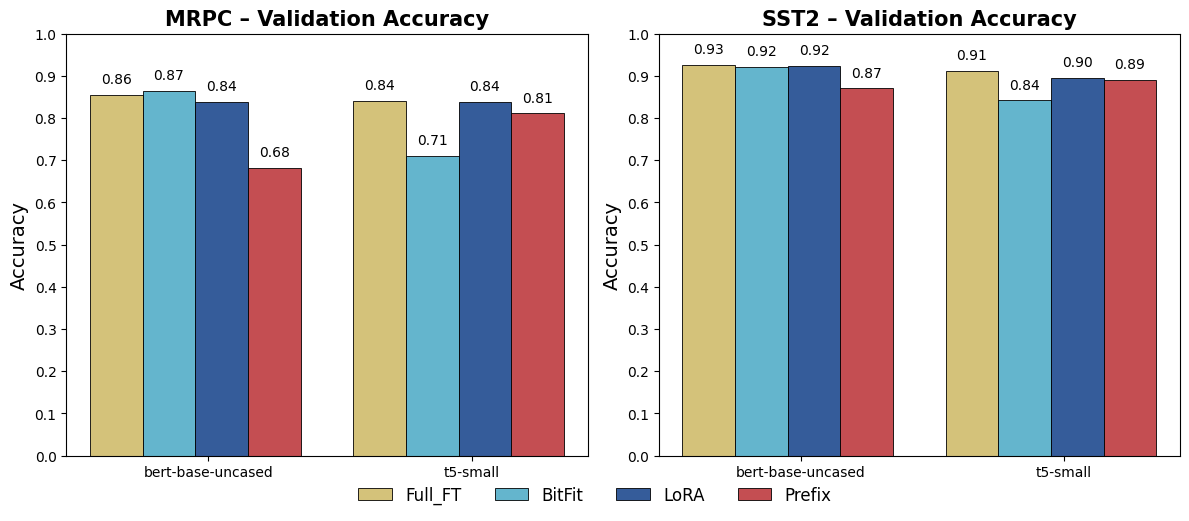

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# =======================
# Load experiment results
# =======================
with open("all_results_t5.json", "r") as f:
    t5_results = json.load(f)

with open("all_results_bert.json", "r") as f:
    bert_results = json.load(f)

all_results = t5_results + bert_results

# 所有任务 & 模型
tasks = sorted(list(set(item["task"] for item in all_results)))
models = sorted(list(set(item["model_name"] for item in all_results)))

# =======================
# Define colors per method
# =======================
method_colors = {
    "full_ft": "#D4C27A",
    "lora": "#355C9A",
    "prefix": "#C44E52",
    "bitfit": "#64B5CD",
}

fig, axes = plt.subplots(1, len(tasks), figsize=(6 * len(tasks), 5), squeeze=False)

x = np.arange(len(models))  # bert-base, t5-small

for t_idx, task in enumerate(tasks):
    task_results = [item for item in all_results if item["task"] == task]


    data_task = {}
    for item in task_results:
        method = item["peft_method"]
        model = item["model_name"]
        acc = item["val_accuracy"]

        if method not in data_task:
            data_task[method] = {"models": [], "acc": []}
        data_task[method]["models"].append(model)
        data_task[method]["acc"].append(acc)

    methods_task = list(data_task.keys())
    n_methods = len(methods_task)
    width = 0.8 / max(1, n_methods)

    ax = axes[0, t_idx]

    for i, method in enumerate(methods_task):
        vals = data_task[method]
        method_acc = []

        for m in models:
            if m in vals["models"]:
                idx = vals["models"].index(m)
                value = vals["acc"][idx]
                method_acc.append(value)
            else:
                method_acc.append(0.0)

        offsets = x + (i - (n_methods - 0.5) / 2) * width
        color = method_colors.get(method, None)
        method_display = {
              "full_ft": "Full_FT",
              "lora": "LoRA",
              "bitfit": "BitFit",
              "prefix": "Prefix"
          }


        bars = ax.bar(offsets, method_acc, width, label=method_display.get(method, method), color=color,edgecolor="black",
linewidth=0.6)


        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 0.02,
                    f"{height:.2f}",
                    ha="center",
                    va="bottom",
                    fontsize=10,
                    rotation=0
                )


    ax.set_ylim(0, 1.0)
    ax.set_yticks(np.arange(0, 1.01, 0.1))
    ax.set_yticklabels([f"{t:.1f}" for t in np.arange(0, 1.01, 0.1)])

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=0)
    ax.set_ylabel("Accuracy", fontsize=14)
    ax.set_title(f"{task.upper()} – Validation Accuracy",fontsize=15, fontweight="bold")


    # if t_idx == 0:
        # ax.legend(title="Method",loc = "upper right")
#         ax.legend(
#     title="Method",
#     loc="upper left",
#     bbox_to_anchor=(1.02, 1.0),
#     borderaxespad=0.,
#     fontsize=11,
#     title_fontsize=12,
#     frameon=True
# )
handles, labels = axes[0, 0].get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    loc="lower center",
    ncol=4,
    fontsize=12,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05)
)

plt.tight_layout()
plt.show()


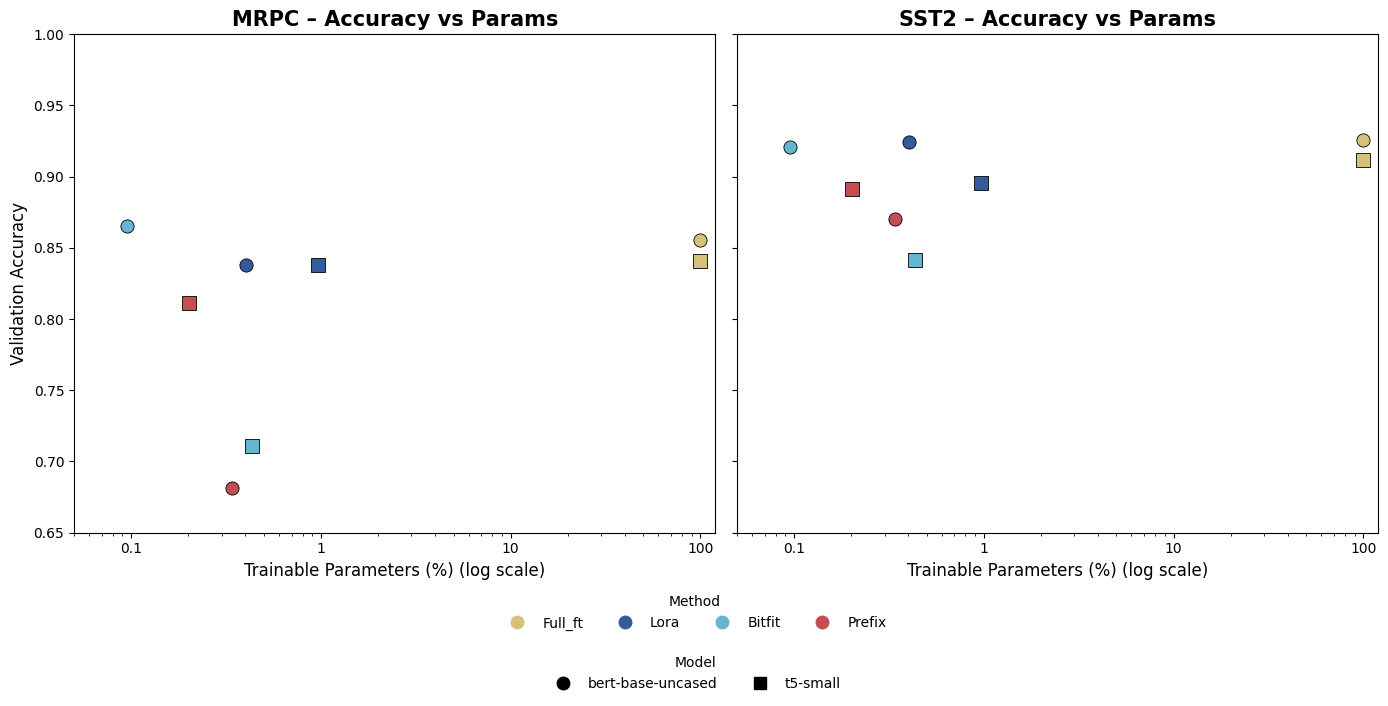

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# =======================
# Load experiment results
# =======================
with open("all_results_bert.json", "r") as f:
    bert_results = json.load(f)

with open("all_results_t5.json", "r") as f:
    t5_results = json.load(f)

all_results = bert_results + t5_results

# =======================
# Visual Encoding
# =======================


method_colors = {
    "full_ft": "#D4C27A",
    "lora": "#355C9A",
    "bitfit": "#64B5CD",
    "prefix": "#C44E52",
}


model_markers =
    "bert-base-uncased": "o",
    "t5-small": "s",
}

# =======================
# Two Tasks
# =======================
tasks = ["mrpc", "sst2"]
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, task in zip(axes, tasks):
    task_results = [x for x in all_results if x["task"].lower() == task]

    for item in task_results:
        model = item["model_name"]
        method = item["peft_method"]

        acc = item["val_accuracy"]
        pct = item["trainable_params"] / item["total_params"] * 100

        ax.scatter(
            pct,
            acc,
            color=method_colors[method],
            marker=model_markers[model],
            s=90,
            edgecolors="black",
            linewidths=0.6
        )


    ax.set_xscale("log")
    ax.set_xticks([0.1, 1, 10, 100])
    ax.set_xticklabels(["0.1", "1", "10", "100"])
    ax.set_xlim(0.05, 120)

    ax.set_ylim(0.65, 1.0)
    # ax.grid(True)
    ax.set_title(f"{task.upper()} – Accuracy vs Params", fontsize=15, fontweight="bold")
    ax.set_xlabel("Trainable Parameters (%) (log scale)", fontsize=12)

axes[0].set_ylabel("Validation Accuracy", fontsize=12)

method_handles = [
    mlines.Line2D([], [], color=c, marker="o", linestyle="None", markersize=9, label=name.capitalize())
    for name, c in method_colors.items()
]

model_handles = [
    mlines.Line2D([], [], color="black", marker=m, linestyle="None", markersize=9, label=name)
    for name, m in model_markers.items()
]

fig.legend(
    handles=method_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.08),
    ncol=4,
    frameon=False,
    title="Method"
)

fig.legend(
    handles=model_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=False,
    title="Model"
)



plt.tight_layout()
plt.savefig("scatter_dual_legend.pdf", dpi=300, bbox_inches="tight")
plt.show()


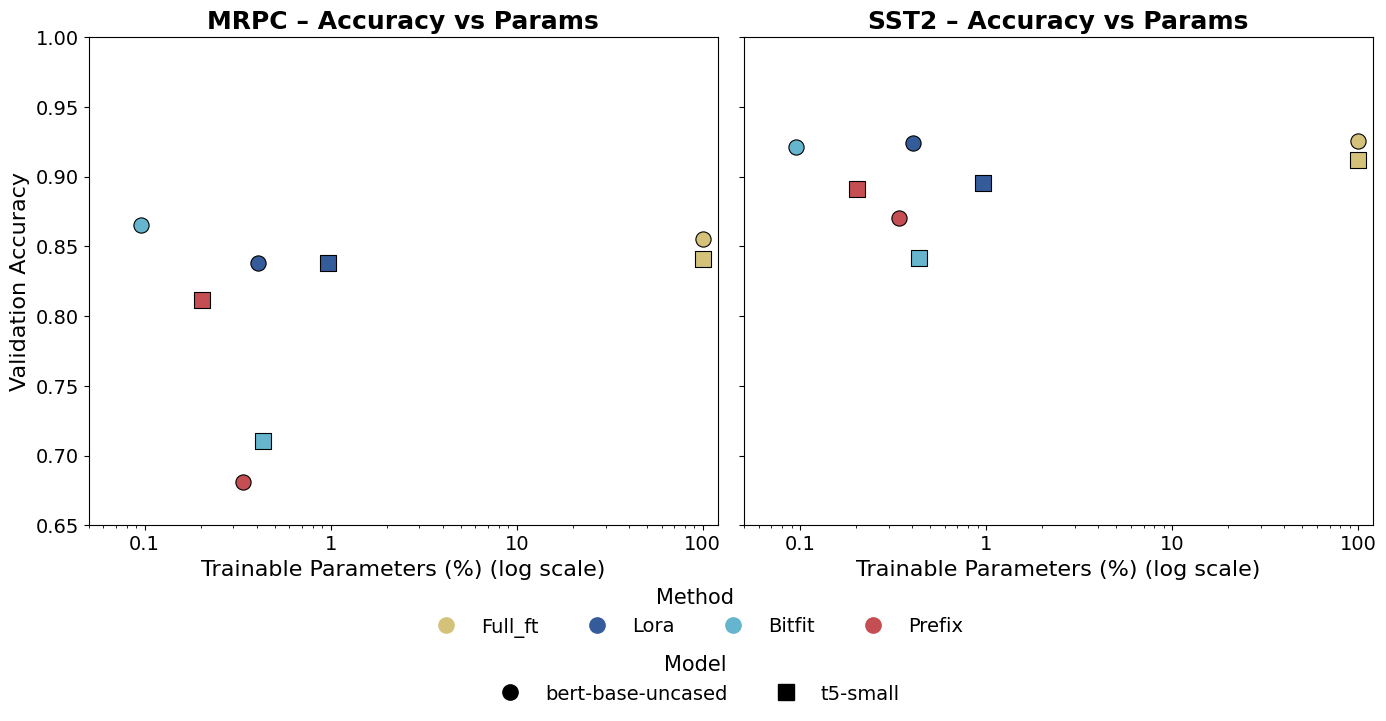

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# =======================
# Load experiment results
# =======================
with open("all_results_bert.json", "r") as f:
    bert_results = json.load(f)

with open("all_results_t5.json", "r") as f:
    t5_results = json.load(f)

all_results = bert_results + t5_results

# =======================
# Visual Encoding
# =======================

method_colors = {
    "full_ft": "#D4C27A",
    "lora": "#355C9A",
    "bitfit": "#64B5CD",
    "prefix": "#C44E52",
}

# 形状 = Model
model_markers = {
    "bert-base-uncased": "o",
    "t5-small": "s",
}

# =======================
# Two Tasks
# =======================
tasks = ["mrpc", "sst2"]
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, task in zip(axes, tasks):
    task_results = [x for x in all_results if x["task"].lower() == task]

    for item in task_results:
        model = item["model_name"]
        method = item["peft_method"]

        acc = item["val_accuracy"]
        pct = item["trainable_params"] / item["total_params"] * 100

        ax.scatter(
            pct,
            acc,
            color=method_colors[method],
            marker=model_markers[model],
            s=120,
            edgecolors="black",
            linewidths=0.8
        )

    # =======================
    # Axis formatting (POSTER FONT SIZE)
    # =======================
    ax.set_xscale("log")
    ax.set_xticks([0.1, 1, 10, 100])
    ax.set_xticklabels(["0.1", "1", "10", "100"], fontsize=14)
    ax.set_xlim(0.05, 120)

    ax.set_ylim(0.65, 1.0)
    ax.tick_params(axis="y", labelsize=14)

    ax.set_title(f"{task.upper()} – Accuracy vs Params",
                 fontsize=18, fontweight="bold")

    ax.set_xlabel("Trainable Parameters (%) (log scale)", fontsize=16)

axes[0].set_ylabel("Validation Accuracy", fontsize=16)

method_handles = [
    mlines.Line2D([], [], color=c, marker="o", linestyle="None", markersize=11,
                  label=name.capitalize())
    for name, c in method_colors.items()
]

model_handles = [
    mlines.Line2D([], [], color="black", marker=m, linestyle="None", markersize=11,
                  label=name)
    for name, m in model_markers.items()
]
fig.legend(
    handles=method_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.10),
    ncol=4,
    frameon=False,
    title="Method",
    fontsize=14,
    title_fontsize=15
)

fig.legend(
    handles=model_handles,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.21),
    ncol=2,
    frameon=False,
    title="Model",
    fontsize=14,
    title_fontsize=15
)

plt.tight_layout()
plt.savefig("scatter_dual_legend_poster_fontsize.pdf", dpi=300, bbox_inches="tight")
plt.show()
